In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(style="whitegrid")

In [2]:
def caldelayb(se):
    record = []
    MAX = 0
    for i in range(1, len(se)):
        if se[i] > MAX:
            MAX = se[i]
        elif se[i] < MAX:
            t = MAX-se[i]
            if t < 185:
                record.append(t)
    return record

In [3]:
def caldelayd(se):
    record = []
    MAX = 0
    for i in range(1, len(se)):
        if se[i] > MAX:
            MAX = se[i]
        elif se[i] < MAX:
            t = MAX-se[i]
            if t < 555:
                record.append(t)
    return record

In [4]:
bikeprefix = "/Users/yangs/Projects/adwater/target/classes/bike/CB201810/"
didiprefix = "/Users/yangs/Projects/adwater/target/classes/didi/DIDI201705/"

In [5]:
didiweek = ["DIDI20170501.csv", "DIDI20170502.csv", "DIDI20170503.csv", "DIDI20170504.csv", "DIDI20170505.csv", "DIDI20170506.csv","DIDI20170507.csv"]
didiweekname = ["Mon", "Tue", "Web", "Thur", "Fri", "Sat", "Sun"]

In [6]:
bikeweek = ["CB20181001.csv", "CB20181002.csv", "CB20181003.csv", "CB20181004.csv", "CB20181005.csv", "CB20181006.csv", "CB20181007.csv"]
bikeweekname = ["Mon", "Tue", "Web", "Thur", "Fri", "Sat", "Sun"]

In [7]:
data = {
    "dataset":[],
    "time(ms)": [],
    "time(s)": [],
    "weekday": []
}

In [8]:
def calbikeday(path, weekday):
    bike = pd.read_csv(path)
    bike = bike['starttime'].apply(lambda x: int(datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S").strftime("%s")))
    b = caldelayb(bike)
    w = [weekday]*len(b)
    s = ["bike"]*len(b)
    return b,w,s

In [9]:
def caldididay(path, weekday):
    didi = pd.read_csv(path)
    didi = didi['t2'].apply(lambda x: int(datetime.strptime(x,"%Y-%m-%d %H:%M:%S").strftime("%s")))
    d = caldelayd(didi)
    w = [weekday]*len(d)
    s = ["didi"]*len(d)
    return d,w,s

In [10]:
for i in range(len(bikeweek)):
    path = bikeprefix+bikeweek[i]
    b,w,s = calbikeday(path, bikeweekname[i])
    data['time(ms)'].extend(b)
    data['time(s)'].extend(b)
    data['weekday'].extend(w)
    data['dataset'].extend(s)

In [11]:
for i in range(len(didiweek)):
    path = didiprefix+didiweek[i]
    b,w,s = caldididay(path, didiweekname[i])
    data['time(s)'].extend(b)
    data['time(ms)'].extend(b)
    data['weekday'].extend(w)
    data['dataset'].extend(s)

In [12]:
df = pd.DataFrame(data)

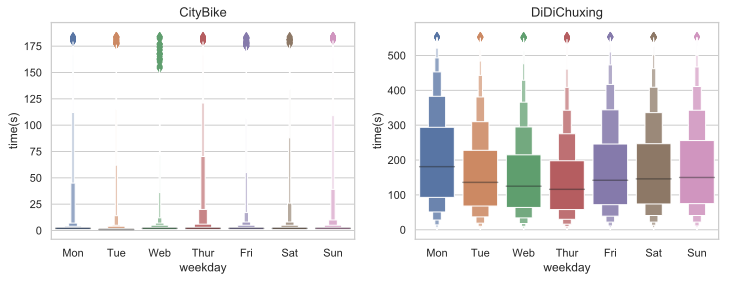

In [20]:
f, ax = plt.subplots(1,2, figsize = (12, 4))
ax[0].set_title("CityBike",fontsize=13)
ax[1].set_title("DiDiChuxing",fontsize=13)
sns.boxenplot(x='weekday', y='time(s)', data=df[df.dataset!="didi"],ax=ax[0])
sns.boxenplot(x='weekday', y='time(s)', data=df[df.dataset!="bike"], ax=ax[1])


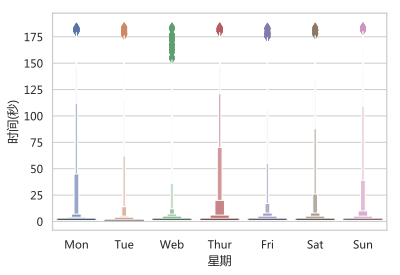

In [17]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft Yahei']
line = sns.boxenplot(x='weekday', y='time(s)', data=df[df.dataset!="didi"])
line.set(xlabel='星期', ylabel='时间(秒)')

plt.savefig('单车迟到时间.pdf',bbox_inches='tight',format='pdf')

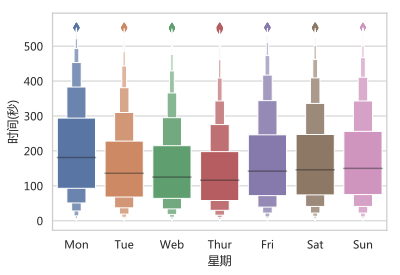

In [18]:
line = sns.boxenplot(x='weekday', y='time(s)', data=df[df.dataset!="bike"])
line.set(xlabel='星期', ylabel='时间(秒)')

plt.savefig('滴滴迟到时间.pdf',bbox_inches='tight',format='pdf')